In [2]:
import ast
import glob
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

In [3]:
orig_imgs = sorted(glob.glob('content/sgp_experiments/sgp_reconstruction_results/orig_cc*.fits*'))
kl_imgs = sorted(glob.glob('content/sgp_experiments/sgp_reconstruction_results/kldiv/deconv_*.fits*'))
beta_imgs = sorted(glob.glob('content/sgp_experiments/sgp_reconstruction_results/betadiv/deconv_*.fits*'))
rl_imgs = sorted(glob.glob('rl_reconstruction_results/kldiv/deconv_*.fits*'))

import pandas as pd
radprof_data = pd.read_csv('../restoration/radprof_params_and_metrics.csv')
radprof_data

,Unnamed: 0,image_name,orig_radprof,fitted_radprof,o_errs,kldiv_radprof,fitted_kldiv,k_errs,betadiv_radprof,fitted_betadiv,b_errs,wasserstein_orig,wasserstein_kldiv,wasserstein_beta
0,0,content/sgp_experiments/sgp_reconstruction_res...,"[292.75347900390625, 242.0030721028646, 222.31...","[280.13142071605984, 258.5829616190436, 228.63...",[31.69609366 1.31602162 0.69566096],"[578.6916520063944, 514.6056449575626, 353.355...","[584.4957308854913, 499.6493079030141, 363.122...",[10.06774887 0.12610739 0.07487224],"[2074.4024780131826, 1090.1093884827226, 302.5...","[2075.7140588842367, 1082.713252221838, 326.18...",[7.56870129e+01 1.04631232e-01 5.11389679e-02],13.660187,3.275842,5.672342
1,1,content/sgp_experiments/sgp_reconstruction_res...,"[-9.848063151041666, -23.150186157226564, -24....","[-9.930389661809091, -21.841808478881816, -27....",[73.78972804 4.16826996 4.42228397],"[2154.195677004072, 1490.7575306031058, 674.65...","[2149.9420751770294, 1508.6075613469084, 633.7...",[23.06968903 0.05538946 0.03651749],"[4625.168988857201, 1918.627905151431, 231.702...","[4625.180506022176, 1918.5446199182857, 232.39...",[4.94218558e+00 4.15338881e-03 2.47797343e-03],57.762187,6.363944,0.356976
2,2,content/sgp_experiments/sgp_reconstruction_res...,"[354.2547912597656, 364.04078674316406, 310.26...","[363.33431633056824, 338.4472770431703, 309.37...",[51.38530933 1.95421563 0.90870509],"[1251.1546863836593, 1039.827460642799, 852.18...","[1256.4214140936094, 1040.556273708974, 805.56...",[112.48744399 0.55758079 0.24274237],"[4181.060850903722, 2568.6027336719003, 1182.3...","[4184.085743295898, 2554.2332633940637, 1211.1...",[1.12874646e+02 7.55971677e-02 3.12832655e-02],11.234253,10.154515,5.584500
3,3,content/sgp_experiments/sgp_reconstruction_res...,"[530.9695841471354, 449.71838760375977, 382.96...","[516.4264438161998, 461.8944217195014, 399.453...",[73.19759612 1.36017924 0.61204101],"[1247.0773708844656, 1070.9244698129537, 693.8...","[1264.395859209374, 1021.8458138334, 728.90334...",[60.91239534 0.28882388 0.14322261],"[4109.986429388412, 2430.8351914297104, 678.97...","[4111.922996227425, 2421.122794978548, 711.005...",[4.22288189e+01 4.48452689e-02 2.79758232e-02],15.619205,8.354774,9.265778
4,4,content/sgp_experiments/sgp_reconstruction_res...,"[344.0923614501953, 315.39882202148436, 275.55...","[341.14531211150694, 319.2325627537565, 276.62...",[10.88385744 0.3513544 0.21514665],"[1315.0044869975065, 847.9449926976324, 307.82...","[1319.4985540901098, 827.7109269413247, 349.90...",[69.31728066 0.195296 0.10083694],"[2698.4395245431947, 1089.277407408449, 163.64...","[2698.54185845786, 1088.5199353316148, 168.487...",[5.13246055e+01 4.97365086e-02 2.52177076e-02],7.225465,8.235840,2.769477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,165,content/sgp_experiments/sgp_reconstruction_res...,"[60.714599609375, 54.272935485839845, 42.02661...","[61.08164589686795, 53.27805832140549, 42.6728...",[6.39849545 0.85286999 0.4481616 ],"[408.9146282793071, 97.15718945584709, 0.0, 0....","[408.9085931554466, 97.1562246635099, 0.023704...",NaN,"[429.3765359053943, 89.4839740960644, 0.0, 0.0...","[429.37385114271046, 89.48360906513906, 0.0183...",NaN,2.081382,0.001462,0.001021
166,166,content/sgp_experiments/sgp_reconstruction_res...,"[112.50370025634766, 98.191274469549, 82.59145...","[112.27882495784789, 99.07555437711518, 81.384...",[7.41358398 0.57207826 0.29645453],"[507.25383038909416, 276.8524612764995, 99.994...","[507.0613415761734, 277.8705290429432, 97.2900...",[8.23465395 0.04617287 0.02161403],"[874.923292819918, 280.9443764495052, 53.17113...","[874.8933934056616, 281.22305844705016, 51.658...",[8.05403989e+01 8.74518845e-02 2.78198956e-02],2.291539,0.497884,0.329503
167,167,content/sgp_experiments/sgp_reconstruction_res...,"[164.17636108398438, 141.51946105957032, 117.3...","[163.82594084840142, 142.6717546797856, 115.23...",[16.57962192 0.82131424 0.41682103],"[649.8507742926571, 331.1035156375716, 116

In [4]:
sum(radprof_data['wasserstein_kldiv'] > radprof_data['wasserstein_beta'])

114

In [5]:
len(orig_imgs), len(beta_imgs), len(kl_imgs), len(rl_imgs)

(170, 170, 170, 170)

In [17]:
for o, k, b, r in zip(orig_imgs, kl_imgs, beta_imgs, rl_imgs):
    assert o.split('_')[5] == k.split('_')[5]
    assert b.split('_')[5] == k.split('_')[5]
    assert r.split('_')[4] == k.split('_')[5]
for o, k, b, r in zip(orig_imgs, kl_imgs, beta_imgs, rl_imgs):
    assert o.split('_')[6] == k.split('_')[6]
    assert b.split('_')[6] == k.split('_')[6]
    assert r.split('_')[5] == k.split('_')[6]

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def axes_colorbar(ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    return cax

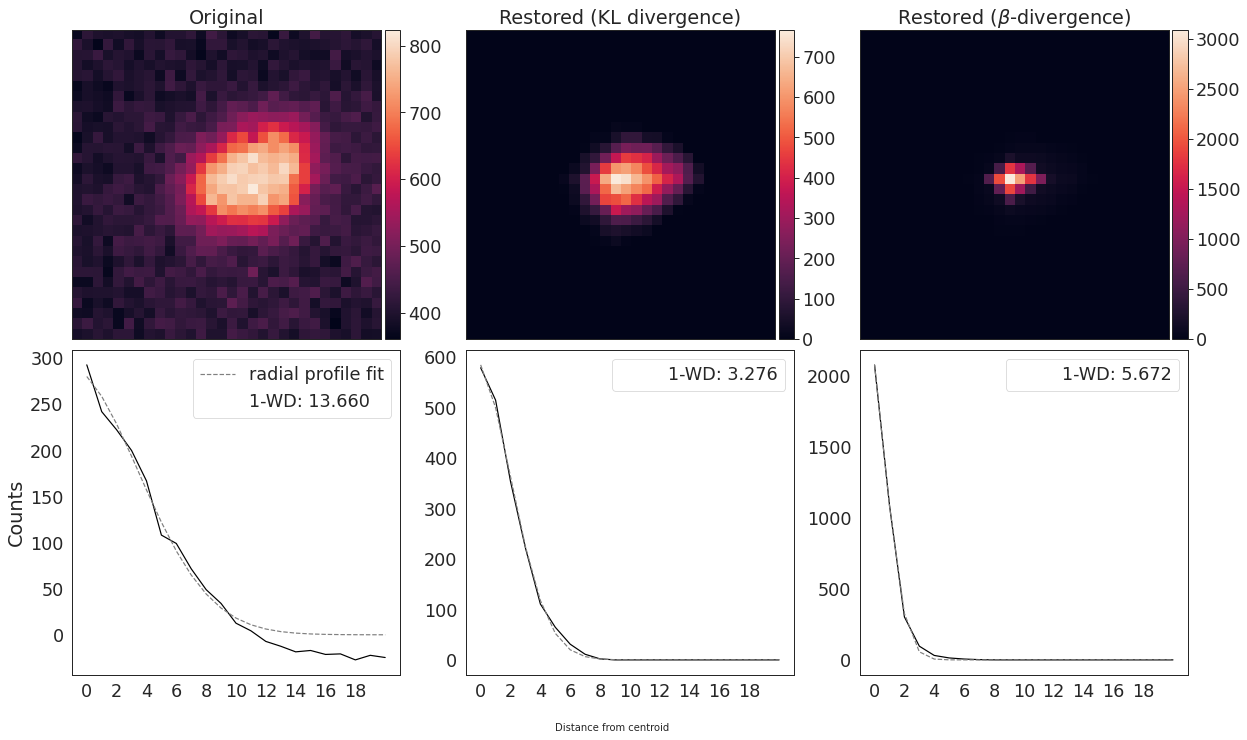

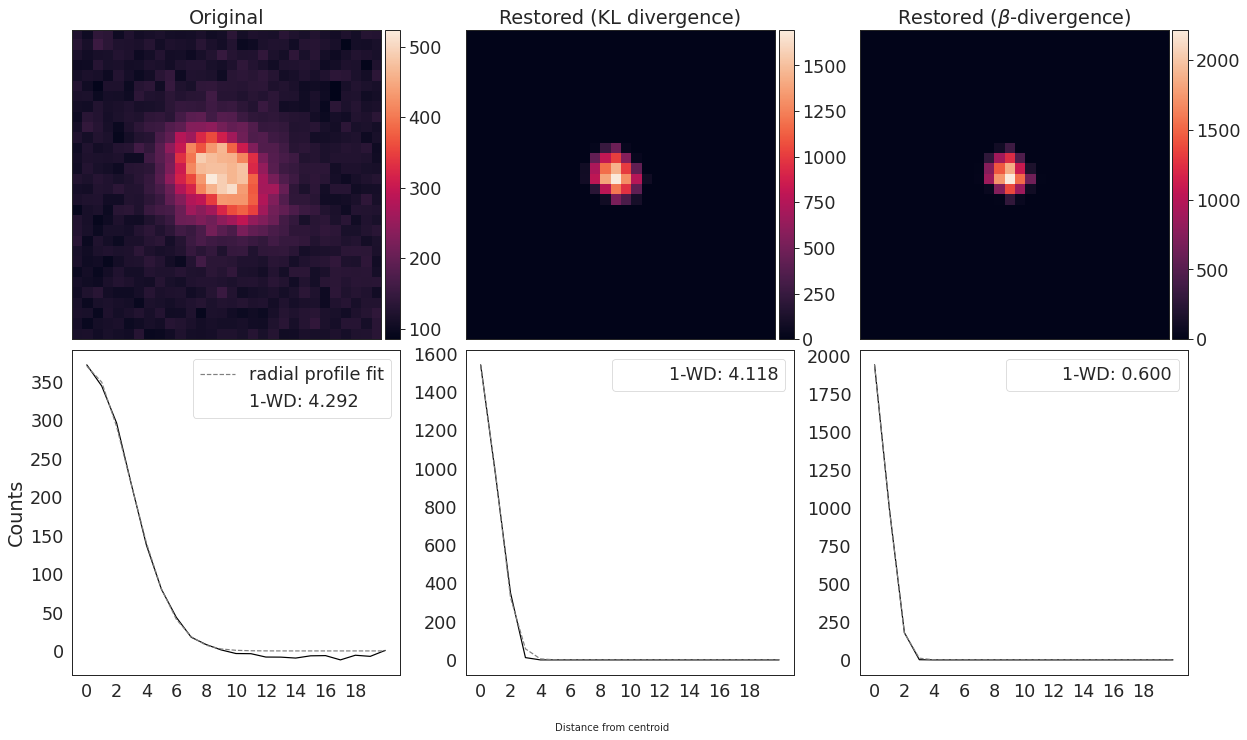

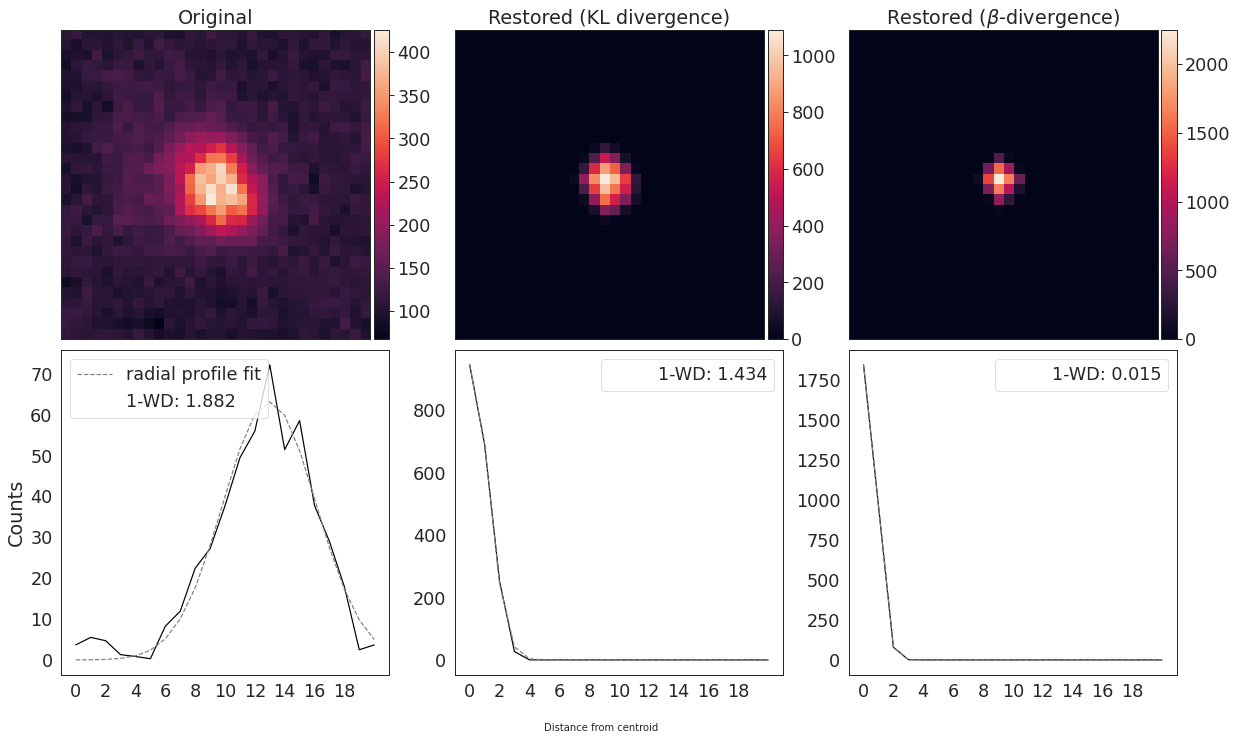

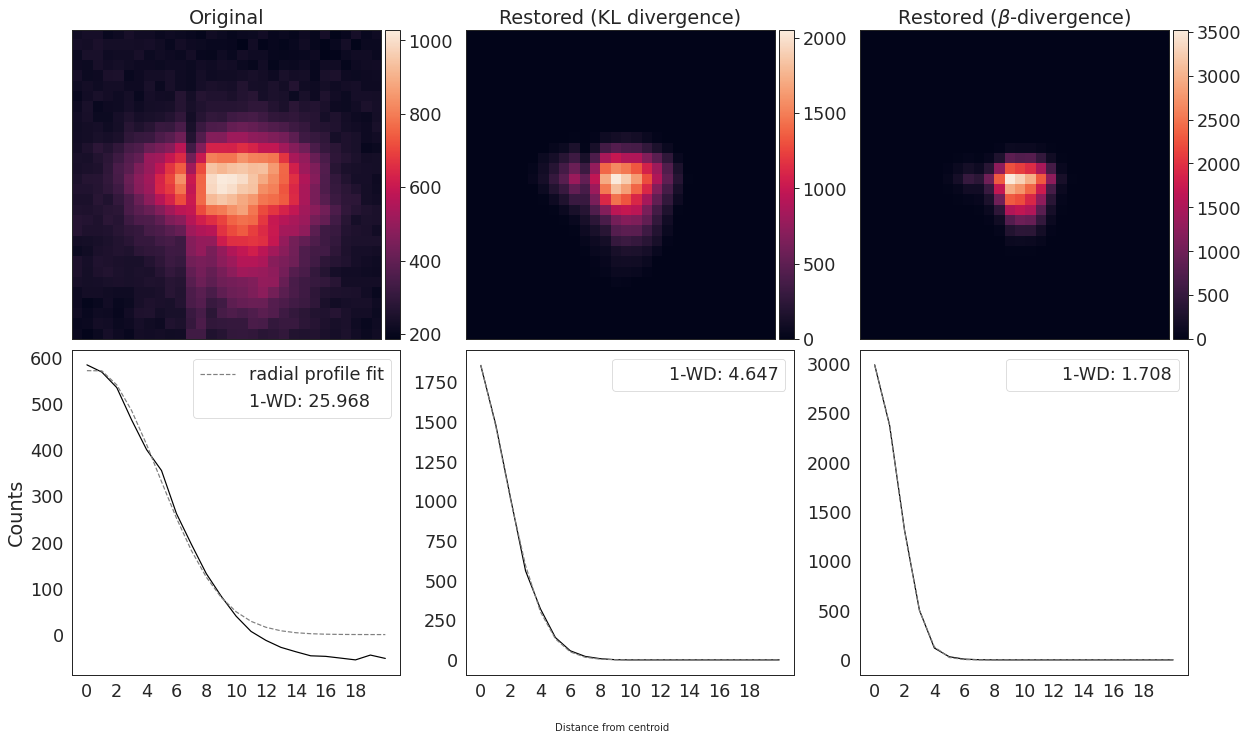

In [19]:
for i, (o, k, b) in enumerate(zip(orig_imgs, kl_imgs, beta_imgs)):
    if i != 0 and i != 13 and i != 34 and i != 61:
        continue

    oi = fits.getdata(o)
    ki = fits.getdata(k)
    bi = fits.getdata(b)

    fig, ax = plt.subplots(2, 3, figsize=(20, 12))
    fig.subplots_adjust(hspace=0.01)
    imo = ax[0, 0].imshow(oi)
    cax0 = axes_colorbar(ax[0, 0])
    fig.colorbar(imo, cax=cax0, orientation='vertical')
    ax[0, 0].set_title('Original')
    imk = ax[0, 1].imshow(ki)
    cax1 = axes_colorbar(ax[0, 1])
    fig.colorbar(imk, cax=cax1, orientation='vertical')
    ax[0, 1].set_title('Restored (KL divergence)')
    imb = ax[0, 2].imshow(bi)
    cax2 = axes_colorbar(ax[0, 2])
    fig.colorbar(imb, cax=cax2, orientation='vertical')
    ax[0, 2].set_title(r'Restored ($\beta$-divergence)')

    ax[1, 0].plot(ast.literal_eval(radprof_data.iloc[i]['orig_radprof']), c='black')
    ax[1, 0].plot(ast.literal_eval(radprof_data.iloc[i]['fitted_radprof']), c='gray', linestyle='--', label='radial profile fit')
    ax[1, 0].set_xticks(ticks=np.arange(0, 20, 2));
    ax[1, 0].set_ylabel("Counts");
    ax[1, 0].plot([], [], ' ', label=f'1-WD: {radprof_data.iloc[i]["wasserstein_orig"]:.3f}')
    ax[1, 0].legend()

    ax[1, 1].plot(ast.literal_eval(radprof_data.iloc[i]['kldiv_radprof']), c='black')
    ax[1, 1].plot(ast.literal_eval(radprof_data.iloc[i]['fitted_kldiv']), c='gray', linestyle='--')
    ax[1, 1].set_xticks(ticks=np.arange(0, 20, 2));
    ax[1, 1].plot([], [], ' ', label=f'1-WD: {radprof_data.iloc[i]["wasserstein_kldiv"]:.3f}')
    ax[1, 1].legend()

    ax[1, 2].plot(ast.literal_eval(radprof_data.iloc[i]['betadiv_radprof']), c='black')
    ax[1, 2].plot(ast.literal_eval(radprof_data.iloc[i]['fitted_betadiv']), c='gray', linestyle='--')
    ax[1, 2].set_xticks(ticks=np.arange(0, 20, 2));
    ax[1, 2].plot([], [], ' ', label=f'1-WD: {radprof_data.iloc[i]["wasserstein_beta"]:.3f}')
    ax[1, 2].legend()

    ax[0, 0].set_xticks([], [])
    ax[0, 0].set_yticks([], [])
    ax[0, 1].set_xticks([], [])
    ax[0, 1].set_yticks([], [])
    ax[0, 2].set_xticks([], [])
    ax[0, 2].set_yticks([], [])

    fig.text(0.5, 0.06, 'Distance from centroid', ha='center')

    plt.savefig(f'{i}.png', dpi=400, bbox_inches='tight')

    plt.show()

## Metrics across all extracted cutouts

In [22]:
import pandas as pd
import numpy as np
eps = np.finfo(float).eps

df = pd.read_csv('fc_sgp_params_and_metrics.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df_beta = pd.read_csv('fc_sgp_params_and_metrics_useBetaDiv.csv')
df_beta.drop(columns=['Unnamed: 0'], inplace=True)

In [40]:
df

,image,num_iters,execution_time,star_coord,flux_before,flux_after,bkg_before,bkg_after,l1_centroid_err,before_ecc,after_ecc,before_fwhm (pix),after_fwhm (pix),flag,bestBeta
0,ccfbta060115.fits,2,0.0293,"(61.625245785151655, 350.58881063085204)",10242.085,10242.0702,396.902100,0.000000,7.3294,0.374541,0.250888,4.5184,4.3172,1,1.0
1,ccfbta060115.fits,2,0.0266,"(464.8122025775832, 305.36885106720945)",72988.914,72988.8812,455.163223,0.000000,2.5578,0.319666,0.159559,8.4748,4.6605,1,1.0
2,ccfbta060115.fits,2,0.0241,"(477.9135732586021, 27.78139818737957)",51880.047,51880.0490,429.778168,0.000000,1.2919,0.383447,0.371622,7.0172,4.7999,1,1.0
3,ccfbta060115.fits,3,0.0710,"(496.7179096460213, 259.4184089917009)",23199.215,23199.2068,422.152161,0.000000,0.8938,0.317862,0.267296,6.6903,4.3297,1,1.0
4,ccfbta060115.fits,2,0.0261,"(238.26495445123206, 413.66943479603486)",24684.370,24684.3740,425.903214,0.000000,1.4393,0.408837,0.331602,7.2509,5.0555,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,ccfbxe310103.fits,3,0.0464,"(94.50890165804584, 357.4469637837015)",6551.994,6552.0038,79.246441,0.000000,1.1815,0.093958,0.079857,5.6798,2.9577,1,1.0
166,ccfbxe310103.fits,3,0.0477,"(480.10888667113414, 27.284009381093234)",7189.220,7189.2221,87.917730,0.000000,0.4809,0.087540,0.091662,5.8291,2.8077,1,1.0
167,ccfbxe310103.fits,1,0.0117,"(502.15445213370094, 518.2246870307468)",11438.559,3023.0925,91.935959,9.350516,0.8639,0.053428,0.186423,5.9323,3.8424,0,1.0
168,ccfbxe310103.fits,3,0.2196,"(297.6137737375366, 311.3358219526331)",3022.444,3022.4443,78.928839,0.000000,0.3820,0.075338,0.090098,4.8415,2.8048,1,1.0


In [230]:
(df['flag'] == 1).mean(), (df_beta['flag'] == 1).mean()

(0.8764705882352941, 0.9411764705882353)

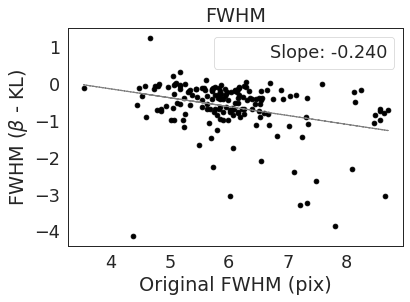

In [224]:
import matplotlib.pyplot as plt
diff = df_beta['after_fwhm (pix)'] - df['after_fwhm (pix)']

x = df['before_fwhm (pix)']
y = diff

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(1, 1)
ax.plot(x, p(x), "--", c='gray')

# print((df['after_fwhm (pix)'] - df_beta['after_fwhm (pix)'] > eps).mean())
ax.scatter(x, y, c='black');
ax.set_xlabel('Original FWHM (pix)')
ax.set_ylabel(r'FWHM ($\beta$ - KL)')
ax.plot([], [], ' ', label=f'Slope: {z[0]:.3f}')
ax.legend()
ax.set_title('FWHM');
plt.savefig('fwhm_comparison.png', dpi=400, bbox_inches='tight')

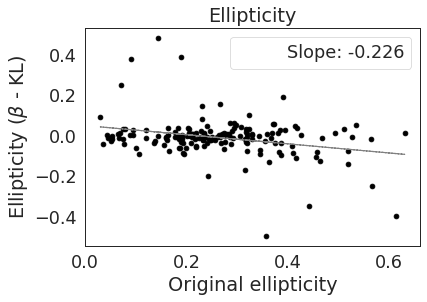

In [225]:
import matplotlib.pyplot as plt
diff = df_beta['after_ecc'] - df['after_ecc']

x = df['before_ecc']
y = diff

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

fig, ax = plt.subplots(1, 1)
ax.plot(x, p(x), "--", c='gray')

# print((df['after_fwhm (pix)'] - df_beta['after_fwhm (pix)'] > eps).mean())
ax.scatter(x, y, c='black');
ax.set_xlabel('Original ellipticity')
ax.set_ylabel(r'Ellipticity ($\beta$ - KL)')
ax.plot([], [], ' ', label=f'Slope: {z[0]:.3f}')
ax.legend();
ax.set_title('Ellipticity');
plt.savefig('ellipticity_comparison.png', dpi=400, bbox_inches='tight')

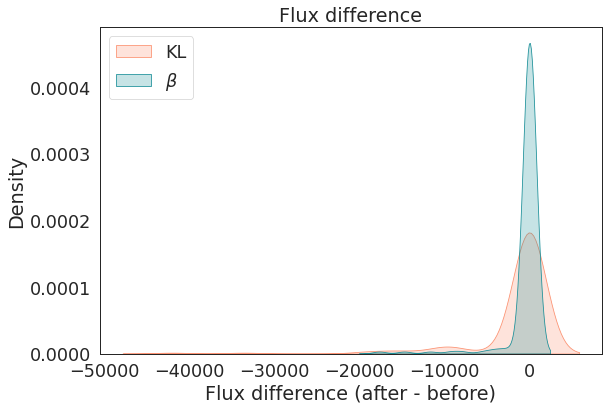

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# import matplotlib
from matplotlib.scale import SymmetricalLogScale

x = df['flux_after'] - df['flux_before']
y = df_beta['flux_after'] - df_beta['flux_before']

sns.kdeplot(x, ax=ax, shade=True, x='Flux difference (after - before)', y=None, color='#FC9272', label='KL')
sns.kdeplot(y, ax=ax, shade=True, color='#1C9099', label=r'$\beta$')

ax.legend(loc='upper left');
ax.set_xlabel('Flux difference (after - before)');
ax.set_title('Flux difference')
plt.savefig('flux_comparison.png', dpi=400, bbox_inches='tight')

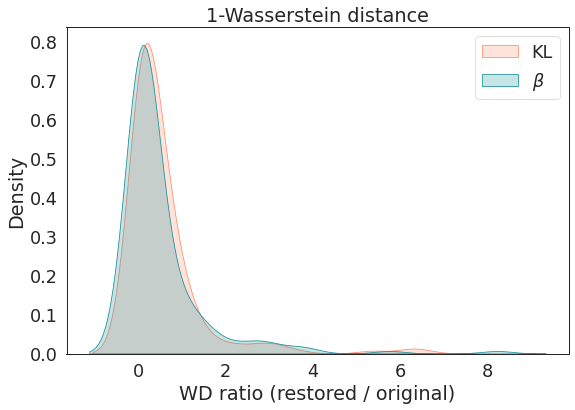

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

eps = np.finfo(float).eps
orig_w = radprof_data['wasserstein_orig']
x = radprof_data['wasserstein_kldiv'] / (orig_w + eps)
y = radprof_data['wasserstein_beta'] / (orig_w + eps)

sns.kdeplot(x, ax=ax, shade=True, x='Flux difference (after - before)', y=None, color='#FC9272', label='KL')
sns.kdeplot(y, ax=ax, shade=True, color='#1C9099', label=r'$\beta$')

ax.legend(loc='upper right');
ax.set_xlabel('WD ratio (restored / original)');
ax.set_title('1-Wasserstein distance');
plt.savefig('wd_comparison.png', dpi=400, bbox_inches='tight')

[0.9117303  0.00457678]


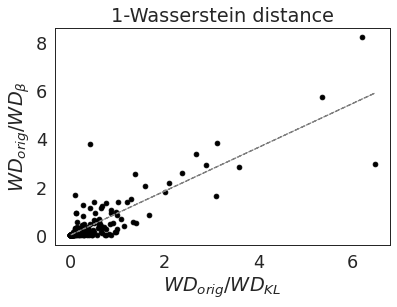

In [223]:
fig, ax = plt.subplots(1, 1)

eps = np.finfo(float).eps
orig_w = radprof_data['wasserstein_orig']
x = radprof_data['wasserstein_kldiv'] / (orig_w + eps)
y = radprof_data['wasserstein_beta'] / (orig_w + eps)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

ax.scatter(x, y, c='black')
ax.set_title('1-Wasserstein distance')
ax.set_xlabel(r'$WD_{orig} / WD_{KL}$')
ax.set_ylabel(r'$WD_{orig} / WD_{\beta}$')
ax.plot(x, p(x), "--", c='gray')
print(z)

######################################################
# fig, ax = plt.subplots(1, 1)

# eps = np.finfo(float).eps
# orig_w = radprof_data['wasserstein_orig']
# x = radprof_data['wasserstein_kldiv'] / (orig_w + eps)
# y = radprof_data['wasserstein_beta'] / (orig_w + eps)
# z = np.polyfit(np.log10(x), np.log10(y), 1)
# p = np.poly1d(z)

# yfit = lambda x: np.exp(p(np.log(x)))

# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.scatter(x, y, c='black')
# ax.plot(x, yfit(x), "--", c='gray')
# print(z)

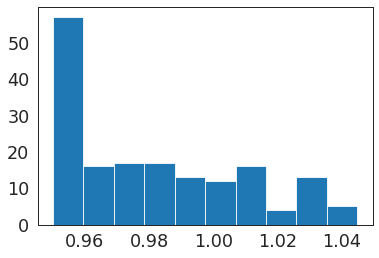

In [150]:
plt.hist(df_beta['bestBeta']);